In [4]:
import pandas as pd

In [5]:
data = pd.read_csv('Downloads/tested.csv')
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [7]:
# Clean data
data['Age'].fillna(data['Age'].median(), inplace=True)
data.drop(columns=['Cabin'], inplace=True)
data.dropna(subset=['Embarked'], inplace=True)

In [9]:
data = data.dropna()
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [10]:
print(data.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   417.000000  417.000000  417.000000  417.000000  417.000000   
mean   1100.635492    0.364508    2.263789   29.525180    0.448441   
std     120.923774    0.481870    0.842077   12.628258    0.897568   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.000000    0.000000    1.000000   23.000000    0.000000   
50%    1101.000000    0.000000    3.000000   27.000000    0.000000   
75%    1205.000000    1.000000    3.000000   35.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  417.000000  417.000000  
mean     0.393285   35.627188  
std      0.982419   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


In [11]:
print(data.corr())

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.024117 -0.025800 -0.028926  0.003259  0.042650   
Survived       -0.024117  1.000000 -0.107203  0.012547  0.099136  0.158534   
Pclass         -0.025800 -0.107203  1.000000 -0.476790  0.002136  0.019581   
Age            -0.028926  0.012547 -0.476790  1.000000 -0.068791 -0.041699   
SibSp           0.003259  0.099136  0.002136 -0.068791  1.000000  0.306566   
Parch           0.042650  0.158534  0.019581 -0.041699  0.306566  1.000000   
Fare            0.008211  0.191514 -0.577147  0.347105  0.171539  0.230046   

                 Fare  
PassengerId  0.008211  
Survived     0.191514  
Pclass      -0.577147  
Age          0.347105  
SibSp        0.171539  
Parch        0.230046  
Fare         1.000000  


In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

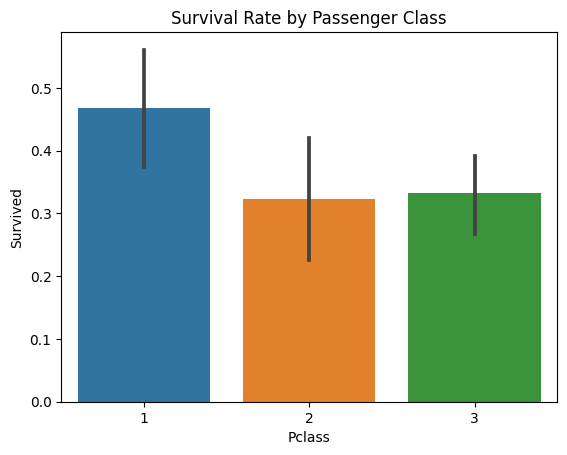

In [14]:
# Plot functions
def plot_survival_by_class():
    sns.barplot(x='Pclass', y='Survived', data=data)
    plt.title('Survival Rate by Passenger Class')
    plt.show()

plot_survival_by_class()

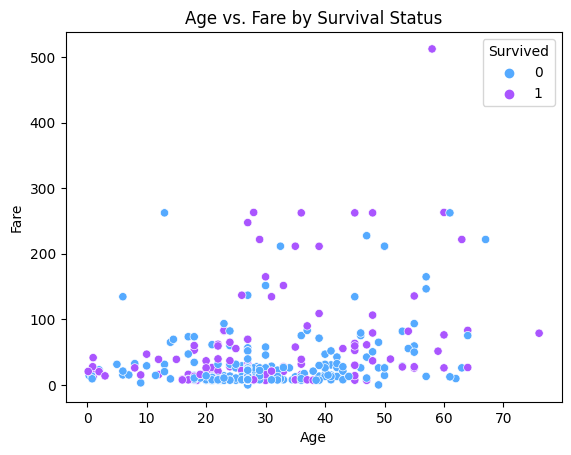

In [15]:
def plot_age_fare_scatter():
    sns.scatterplot(x='Age', y='Fare', hue='Survived', data=data, palette='cool')
    plt.title('Age vs. Fare by Survival Status')
    plt.show()
plot_age_fare_scatter()

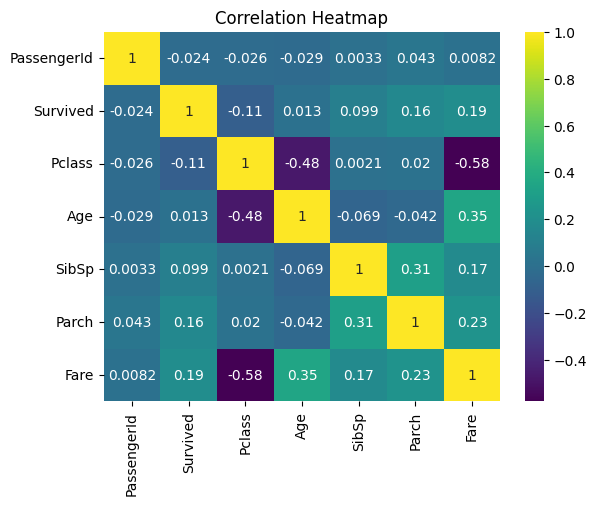

In [16]:
def plot_correlation_heatmap():
    corr = data.corr()
    sns.heatmap(corr, annot=True, cmap='viridis')
    plt.title('Correlation Heatmap')
    plt.show()
plot_correlation_heatmap()